In [5]:
import requests 
import json
import pandas as pd
import numpy as np
from scipy import stats
from sodapy import Socrata
import matplotlib.pyplot as plt  # added Matplotlib - for graphing (cp 6-19-19)


In [6]:
client = Socrata("chronicdata.cdc.gov", None)
url = "https://chronicdata.cdc.gov/resource/rb39-ixr6.json"
results = client.get("rb39-ixr6", limit=38708)

In [7]:
#results

In [8]:
#print(requests.get(url))

In [9]:
#print(requests.get(url).json())

In [10]:
#response = requests.get(url).json()
#print(json.dumps(response, indent = 4, sort_keys=True))
#marked out due to API stuff discussed with Brent

In [11]:
health_df = pd.DataFrame(results)
health_df.count()

:@computed_region_bxsw_vy29    37220
:@computed_region_he4y_prf8    37750
age                            38708
data_value                     24275
data_value_footnote            14433
data_value_footnote_symbol     14433
data_value_std_err             24275
data_value_type                38708
data_value_unit                38708
datasource                     38708
displayorder                   38708
education                      38708
gender                         38708
geolocation                    38708
high_confidence_limit          24275
locationabbr                   38708
locationdesc                   38708
low_confidence_limit           24275
measuredesc                    38708
measureid                      38708
race                           38708
response                       38708
sample_size                    24275
stratificationid1              38708
stratificationid2              38708
stratificationid3              38708
stratificationid4              38708
s

In [12]:
#Collecting a list of all columns within the DataFrame/
health_df.columns

Index([':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8', 'age',
       'data_value', 'data_value_footnote', 'data_value_footnote_symbol',
       'data_value_std_err', 'data_value_type', 'data_value_unit',
       'datasource', 'displayorder', 'education', 'gender', 'geolocation',
       'high_confidence_limit', 'locationabbr', 'locationdesc',
       'low_confidence_limit', 'measuredesc', 'measureid', 'race', 'response',
       'sample_size', 'stratificationid1', 'stratificationid2',
       'stratificationid3', 'stratificationid4', 'submeasure', 'submeasureid',
       'topicdesc', 'topicid', 'topictype', 'topictypeid', 'year'],
      dtype='object')

In [13]:
# Reorganizing the columns using double brackets
organized_df = health_df[["year","locationdesc","topicdesc","measuredesc","submeasure","data_value","sample_size","gender","age","race","education", "geolocation"]]
organized_df.head()

,year,locationdesc,topicdesc,measuredesc,submeasure,data_value,sample_size,gender,age,race,education,geolocation
0,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [14]:
renamed_df = organized_df.rename(columns={"year":"Year","locationdesc":"State","topicdesc":"Use Type","measuredesc":"Status","submeasure":"Frequency","data_value":"% of Respondents","sample_size":"Sample Size","gender":"Gender","age":"Age","race":"Race","education":"Education"})
renamed_df.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
0,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [15]:
Minus_NatPRGuam= renamed_df.loc[renamed_df["State"] !=("National (States and DC)", "Puerto Rico", "Guam")]
Minus_NatPRGuam.head()
#Minus_Ohio['C'] = np.arange(len(Minus_Ohio))
#print (Minus_Ohio)

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
0,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [16]:
USA=Minus_NatPRGuam.dropna(how='any')
USA.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
1,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
4,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."
5,2005,Delaware,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,5.1,2684,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-75.57774116..."
7,2005,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.1,570,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."


In [17]:
National= renamed_df.loc[renamed_df["State"] =="National (States and DC)"]
National.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
2366,2015,National (States and DC),E-Cigarette Use (Youth),User Status,Current E-Cigarette User,25.8,721,Overall,All Ages,Multiple Race,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7236,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,5.4,7450,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7244,1995,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7251,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.6,6467,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7261,2009,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.5,6698,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [18]:
no_null_National =National.dropna(how='any')
no_null_National.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
2366,2015,National (States and DC),E-Cigarette Use (Youth),User Status,Current E-Cigarette User,25.8,721,Overall,All Ages,Multiple Race,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7236,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,5.4,7450,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7251,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.6,6467,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7261,2009,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.5,6698,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7282,2003,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.9,372,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [19]:
Ohio_df= renamed_df.loc[renamed_df["State"] =="Ohio"]
Ohio_df.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
149,2013,Ohio,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
246,2005,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Multiple Race,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
287,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,American Indian/Alaska Native,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
365,1999,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
478,1999,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,22.1,1993,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [157]:
no_null_OH =Ohio_df.dropna(how='any')
no_null_OH.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
478,1999,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,22.1,1993,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
494,2003,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4,544,Male,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
572,2005,Ohio,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.2,661,Male,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
696,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,51.5,1339,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
831,2013,Ohio,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.2,864,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [21]:
no_null_National.dtypes

Year                object
State               object
Use Type            object
Status              object
Frequency           object
% of Respondents    object
Sample Size         object
Gender              object
Age                 object
Race                object
Education           object
geolocation         object
dtype: object

In [22]:
#no_null_State.t0 float

no_null_National[['% of Respondents']]=no_null_National[['% of Respondents']].astype(float)

C:\Users\carol\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [23]:
no_null_OH[['% of Respondents']]=no_null_OH[['% of Respondents']].astype(float)

In [24]:
#state_counts = converted_df["Race"].value_counts()
#state_counts.head()
# Finding the average weight of all students
#no_null_State["% of Respondents"].mean()

In [25]:
no_null_National.dtypes

Year                 object
State                object
Use Type             object
Status               object
Frequency            object
% of Respondents    float64
Sample Size          object
Gender               object
Age                  object
Race                 object
Education            object
geolocation          object
dtype: object

In [26]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_usa_df = no_null_National.groupby(['Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])


# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_usa_df)

# In order to be visualized, a data function must be used...
#grouped_usa_df.count()

In [27]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_OH_df = no_null_OH.groupby(['Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])


# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_OH_df)

In [28]:
grouped_OH_comparison = grouped_OH_df.mean()
grouped_OH_comparison

% of Respondents
Year Use Type                      Status         Frequency                       Gender  Age      Race             Education                    
1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School              29.0
                                                                                  Male    All Ages All Races        High School              30.4
                                                                                  Overall All Ages African American High School              14.2
                                                                                                   All Races        High School              29.7
                                                                                                   White            High School              32.8
                                                  Ever Cigarette Smoker           Female  All Ages All Races        High School              66.0
                                                                                  Male    All Ages All Races        High School              71.0
                                                                                  Overall All Ages African American High School              65.1
                                                                                                   All Races        High School              68.6
                                                                                                   White            High School              68.8
                                                  Frequent Cigarette Smoker       Female  All Ages All Races        High School              12.3
                                                                                  Male    All Ages All Races        High School              16.1
                                                                                  Overall All Ages African American High School               3.3
                                                                                                   All Races        High School              14.3
                                                                                                   White            High School              16.6
1997 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School              32.0
                                                                                  Male    All Ages All Races        High School              36.9
                                                                                  Overall All Ages African American High School              19.6
                                                                                                   All Races        High School              34.5
                                                                                                   White            High School              38.1
                                                  Ever Cigarette Smoker           Female  All Ages All Races        High School              67.8
                                                                                  Male    All Ages All Races        High School              70.5
                                                                                  Overall All Ages African American High School              67.3
                                                                                                   All Races        High School              69.2
                                                                                                   White            High School              69.0
                                                  Frequent Cigarette Smoker       Female  All Ages All Races        High School              16.4
                                         

In [29]:
grouped_usa_comparison = grouped_usa_df.mean()
grouped_usa_comparison

% of Respondents
Year Use Type                      Status         Frequency                       Gender  Age      Race                          Education                    
1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races                     High School              31.2
                                                                                  Male    All Ages All Races                     High School              29.8
                                                                                  Overall All Ages African American              High School              15.4
                                                                                                   All Races                     High School              30.5
                                                                                                   American Indian/Alaska Native High School              35.8
                                                                                                   Asian                         High School              20.5
                                                                                                   Hispanic                      High School              28.7
                                                                                                   White                         High School              33.7
                                                  Ever Cigarette Smoker           Female  All Ages All Races                     High School              68.7
                                                                                  Male    All Ages All Races                     High School              70.1
                                                                                  Overall All Ages African American              High School              67.1
                                                                                                   All Races                     High School              69.5
                                                                                                   American Indian/Alaska Native High School              75.8
                                                                                                   Asian                         High School              55.7
                                                                                                   Hispanic                      High School              71.8
                                                                                                   White                         High School              70.2
                                                  Frequent Cigarette Smoker       Female  All Ages All Races                     High School              13.5
                                                                                  Male    All Ages All Races                     High School              14.0
                                                                                  Overall All Ages African American              High School               4.6
                                                                                                   All Races                     High School              13.8
                                                                                                   American Indian/Alaska Native High School              23.0
                                                                                                   Asian                         High School               9.9
                                                                                                   Hispanic                      High School               7.7
                                                                                                   White                         High School              16.1
1995 Cig

In [184]:
combined_df = pd.merge(grouped_usa_comparison, grouped_OH_comparison,on=['Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])
combined_df.head()

% of Respondents_x  \
Year Use Type              Status         Frequency                Gender  Age      Race             Education                         
1993 Cigarette Use (Youth) Smoking Status Current Cigarette Smoker Female  All Ages All Races        High School                31.2   
                                                                   Male    All Ages All Races        High School                29.8   
                                                                   Overall All Ages African American High School                15.4   
                                                                                    All Races        High School                30.5   
                                                                                    White            High School                33.7   

                                                                                                                  % of Respondents_y  
Year Use Type              Status         Frequency                Gender  Age      Race             Education                        
1993 Cigarette Use (Youth) Smoking Status Current Cigarette Smoker Female  All Ages All Races        High School                29.0  
                                                                   Male    All Ages All Races        High School                30.4  
                                                                   Overall All Ages African American High School                14.2  
                                                                                    All Races        High School                29.7  
                                                                                    White            High School                32.8

In [185]:
combined_df = combined_df.rename(columns={"% of Respondents_x":"% of USA","% of Respondents_y":"% of Ohio"})

combined_df.head()

% of USA  \
Year Use Type              Status         Frequency                Gender  Age      Race             Education               
1993 Cigarette Use (Youth) Smoking Status Current Cigarette Smoker Female  All Ages All Races        High School      31.2   
                                                                   Male    All Ages All Races        High School      29.8   
                                                                   Overall All Ages African American High School      15.4   
                                                                                    All Races        High School      30.5   
                                                                                    White            High School      33.7   

                                                                                                                  % of Ohio  
Year Use Type              Status         Frequency                Gender  Age      Race             Education               
1993 Cigarette Use (Youth) Smoking Status Current Cigarette Smoker Female  All Ages All Races        High School       29.0  
                                                                   Male    All Ages All Races        High School       30.4  
                                                                   Overall All Ages African American High School       14.2  
                                                                                    All Races        High School       29.7  
                                                                                    White            High School       32.8

In [223]:
columns = ['Year', 'Race', '% of Respondents','Sample Size', 'Use Type', 'Status', 'Frequency']
ethnicity_df = pd.DataFrame(no_null_National, columns=columns)

ethnicity_df.head()

,Year,Race,% of Respondents,Sample Size,Use Type,Status,Frequency
2366,2015,Multiple Race,25.8,721,E-Cigarette Use (Youth),User Status,Current E-Cigarette User
7236,2011,All Races,5.4,7450,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker
7251,2013,All Races,39.6,6467,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker
7261,2009,White,22.5,6698,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker
7282,2003,Asian,3.9,372,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker


In [224]:
# Bigger font sizes for plots
plt.rcParams.update({'font.size': 32})
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=12) 
plt.rc('labelsize: large') 

# Do not truncate dataframe displays up to 500 columns
pd.set_option('display.max_columns', 500)

In [225]:
# Convert categorical columns to categories
ethnicity_df['Race'] = ethnicity_df['Race'].astype('category')
ethnicity_df['Year'] = ethnicity_df['Year'].astype('category')
ethnicity_df['% of Respondents'] = ethnicity_df['% of Respondents'].astype('category')

# Convert Percent column to an actual percent
#ethnicity_df['% of Respondents'] = ethnicity_df['% of Respondents']/100

In [237]:
# Sort by year
ethnicity_df.sort_values(by='Year', inplace=True)

# Reset index
#ethnicty_df.reset_index(drop=True, inplace=True)

ethnicity_df.head()


,Year,Race,% of Respondents,Sample Size,Use Type,Status,Frequency
8029,1993,All Races,31.2,7991,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker
9508,1993,Asian,9.9,528,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker
9619,1993,All Races,68.7,8182,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker
8864,1993,White,33.7,6483,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker
7971,1993,American Indian/Alaska Native,75.8,178,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker


In [238]:
ethnicities = list(np.unique(ethnicity_df['Race']))
year = list(np.unique(ethnicity_df['Year']))
percentages = list(np.unique(ethnicity_df['% of Respondents']))

print 'ethnicities ({}):'.format(len(list(np.unique(ethnicity_df['Race'])))), ethnicities
print ""
print 'year ({}):'.format(len(list(np.unique(ethnicity_df['Year'])))), year
print ""
print 'percentages ({}):'.format(len(list(np.unique(ethnicity_df['% of Respondents'])))), percentages


SyntaxError: invalid syntax (<ipython-input-238-82665f091316>, line 5)

Text(0.5, 0, 'Race')

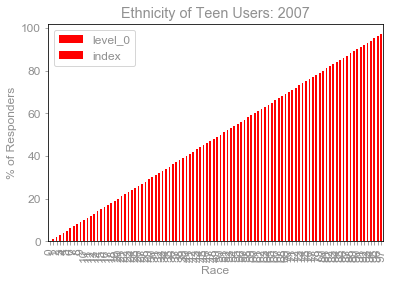

In [183]:

race_year_2007.plot(kind="bar", facecolor="red")
# Set textual properties
plt.title("Ethnicity of Teen Users: 2007")
plt.ylabel("% of Responders")
plt.xlabel("Race")



In [88]:
# CP 6-19-19
# Ethnicity BAR Graphs using combined_df 

# Calculate the percent usage for each race
race_usage_change =  100 * (race_usage_pivot_mean.iloc[-1] - race_usage_pivot_mean.iloc[0]) / race_usage_pivot_mean.iloc[0]
#usage_sem =  100 * (usage_pivot_sem.iloc[-1] - usage_sem.iloc[0]) / tusage_pivot_sem.iloc[0]

# Display the data to confirm
race_usage_change



Race
African American                -74.844247
All Races                       -72.153604
American Indian/Alaska Native   -75.608599
Asian                           -80.665532
Hispanic                        -69.334436
Multiple Race                          NaN
Pacific Islander                       NaN
White                           -73.538894
dtype: float64

In [97]:
# Store all Relevant Ethnic data into a Tuple
race_data = (race_usage_change["All Races"], 
               race_usage_change["African American"], 
               race_usage_change["American Indian/Alaska Native"], 
               race_usage_change["Asian"],
            race_usage_change["Hispanic"],
            race_usage_change["Multiple Race"],
            race_usage_change["Pacific Islander"],
            race_usage_change["White"])


C:\Users\carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


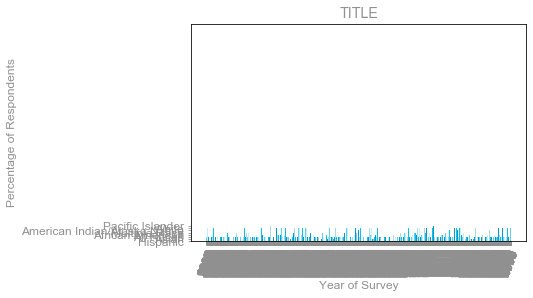

In [103]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
ind = np.arange(len(USA['Year']))
bars1 = ax.bar(ind, USA['Race'], 
        color = color_palette_list, 
        label='Percentage of Responders by Race')
ax.set_title("TITLE")
ax.set_ylabel("Percentage of Respondents")
ax.set_ylim((0,100))
ax.set_xticks(range(0,len(ind)))
ax.set_xticklabels(list(USA['Year']), rotation=70)
ax.set_xlabel("Year of Survey")

# Save the Figure
fig.savefig("VIS 5.png")

# Show the Figure
fig.show()

NameError: name 'autolabelrects' is not defined

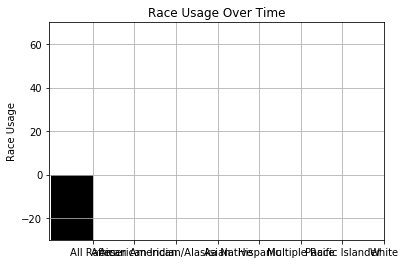

In [94]:
# Splice the data 
fig, ax = plt.subplots()
ind = np.arange(len(race_usage_change))  
width = 1
rects = ax.bar(ind[0], race_usage_change[0], width, color='black')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('Race Usage')
ax.set_title('Race Usage Over Time')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('All Races', 'African American', 'American Indian/Alaska Native', 'Asian', 'Hispanic', 'Multiple Race', 'Pacific Islander', 'White'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelrects(rects)


# Save the Figure
fig.savefig("VIS 5.png")

# Show the Figure
fig.show()